# Data Analysis

## File Handling

In [1]:
import pandas as pd
import numpy as np

file_path = 'AusApparalSales4thQrt2020.csv'
df = pd.read_csv(file_path);

## Null check

### Observations
1. Checked Dataframe for isna(). There are no null data by columns.
2. Made sure there are non null data by doing notna()
3. count() and notna() matches

In [2]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [3]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [4]:
df.count()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

## Adjusting Improper Data

### Observations
1. String data type values have extra space
2. Removed extra space and adjusted the data

In [5]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [6]:
df['State'] = df['State'].str.strip()
df['Time'] = df['Time'].str.strip()
df['Group'] = df['Group'].str.strip()

In [7]:
df['State'].unique()

array(['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS'], dtype=object)

In [8]:
df['Time'].unique()

array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [9]:
df['Group'].unique()

array(['Kids', 'Men', 'Women', 'Seniors'], dtype=object)

## Checking count by State

### Observations
1. Checking to see if data count matches by State
2. All State have equal data count

In [10]:
df[df['State']=='WA'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [11]:
df[df['State']=='NT'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [12]:
df[df['State']=='SA'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [13]:
df[df['State']=='VIC'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [14]:
df[df['State']=='QLD'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [15]:
df[df['State']=='NSW'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

In [16]:
df[df['State']=='TAS'].count()

Date     1080
Time     1080
State    1080
Group    1080
Unit     1080
Sales    1080
dtype: int64

## Checking count by Time

### Observations
1. Checking data count by Time of Day
2. All Time-of-Day have equal data count

In [17]:
df[df['Time']=='Morning'].count()

Date     2520
Time     2520
State    2520
Group    2520
Unit     2520
Sales    2520
dtype: int64

In [18]:
df[df['Time']=='Afternoon'].count()

Date     2520
Time     2520
State    2520
Group    2520
Unit     2520
Sales    2520
dtype: int64

In [19]:
df[df['Time']=='Evening'].count()

Date     2520
Time     2520
State    2520
Group    2520
Unit     2520
Sales    2520
dtype: int64

## Data Normalization

In [20]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [21]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [22]:
normalized_df = df.copy();
normalized_df['Sales'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())
normalized_df['Unit'] = (df['Unit'] - df['Unit'].min()) / (df['Unit'].max() - df['Unit'].min())
normalized_df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


## Grouping Sales by Group column

### Observations
1. Grouping the total Sales by "Group"
2. Men group have the most sales
3. Seniors group have the least sales

In [23]:
normalized_df[['Group', 'Sales']].groupby('Group').sum().sort_values(by='Sales', ascending=False)

,Sales
Group,
Men,484.444444
Women,482.492063
Kids,480.142857
Seniors,473.571429


## Grouping Sales by Time-of-day

### Observations
1. Grouping the total sales by "Time-of-day"
2. Morning time drives the most sales
3. Sales ramps down on Evening hours

In [24]:
time_of_day_df = normalized_df[['Time', 'Sales']].groupby('Time').sum().sort_values(by='Sales', ascending=False)
time_of_day_df

,Sales
Time,
Morning,645.126984
Afternoon,643.857143
Evening,631.666667


## Grouping Sales by Date

In [25]:
normalized_df[['Date', 'Sales']].groupby('Date').sum().sort_values(by='Sales', ascending=False).head()

,Sales
Date,
14-Dec-2020,27.587302
10-Dec-2020,27.285714
26-Dec-2020,27.269841
15-Dec-2020,26.904762
9-Dec-2020,26.888889


## Mean, Median, Max, and Std for different groups

In [26]:
normalized_df.pivot_table(columns='Group', values=['Sales'], aggfunc=['mean', 'median', 'max', 'std']).round(5)

mean                              median                             \
Group     Kids      Men  Seniors    Women     Kids      Men  Seniors    Women   
Sales  0.25404  0.25632  0.25057  0.25529  0.19048  0.19048  0.19048  0.19048   

       max                             std                            
Group Kids      Men Seniors Women     Kids     Men  Seniors    Women  
Sales  1.0  0.98413     1.0   1.0  0.20236  0.2043  0.20441  0.20814

## Group with most sales

In [27]:
normalized_df[['Group', 'Sales']].groupby('Group').sum().sort_values(by='Sales', ascending=False).head(1)

,Sales
Group,
Men,484.444444


## Group with least sales

In [28]:
normalized_df[['Group', 'Sales']].groupby('Group').sum().sort_values(by='Sales', ascending=False).tail(1)

,Sales
Group,
Seniors,473.571429


## Day with most sales

In [29]:
normalized_df[['Date', 'Sales']].groupby('Date').sum().sort_values(by='Sales', ascending=False).head(1)

,Sales
Date,
14-Dec-2020,27.587302


## Day with least sales

In [30]:
normalized_df[['Date', 'Sales']].groupby('Date').sum().sort_values(by='Sales', ascending=False).tail(1)

,Sales
Date,
2-Nov-2020,14.634921


In [31]:
report_df = normalized_df.copy()
report_df['Date'] = pd.to_datetime(df['Date'])
report_df.set_index('Date', inplace=True)

In [32]:
daily_report = report_df.resample('D').agg({'Sales': 'sum'})
daily_report

,Sales
Date,
2020-10-01,20.952381
2020-10-02,20.920635
2020-10-03,22.031746
2020-10-04,20.952381
2020-10-05,21.857143
...,...
2020-12-26,27.269841
2020-12-27,26.777778
2020-12-28,26.507937


In [33]:
weekly_report = report_df.resample('W').agg({'Sales': 'sum'})
weekly_report

,Sales
Date,
2020-10-04,84.857143
2020-10-11,152.777778
2020-10-18,150.476190
2020-10-25,151.587302
2020-11-01,122.460317
2020-11-08,113.809524
2020-11-15,115.761905
2020-11-22,115.380952
2020-11-29,117.698413


In [34]:
monthly_report = report_df.resample('ME').agg({'Sales': 'sum'})
monthly_report

,Sales
Date,
2020-10-31,645.650794
2020-11-30,495.761905
2020-12-31,779.238095


In [35]:
quarterly_report = report_df.resample('QE').agg({'Sales': 'sum'})
quarterly_report

,Sales
Date,
2020-12-31,1920.650794


In [36]:
pivot_table = pd.pivot_table(data=df,
                             index=['State','Group'], 
                             values=['Sales'],
                             aggfunc=['sum']
                             )
pivot_table

sum
                  Sales
State Group            
NSW   Kids     18587500
      Men      19022500
      Seniors  18187500
      Women    19172500
NT    Kids      5700000
      Men       5762500
      Seniors   5465000
      Women     5652500
QLD   Kids      8510000
      Men       8392500
      Seniors   8190000
      Women     8325000
SA    Kids     14515000
      Men      14655000
      Seniors  14717500
      Women    14970000
TAS   Kids      5775000
      Men       5757500
      Seniors   5650000
      Women     5577500
VIC   Kids     26360000
      Men      26407500
      Seniors  26315000
      Women    26482500
WA    Kids      5625000
      Men       5752500
      Seniors   5512500
      Women     5262500

# Final Report

## Observations
- Daily Report:
    - Depicted the Daily Report using Scatter Plot as it is statistical analysis
    - The Daily Report provides granular sales data by date
    - Dec 14th has the most sales
    - Nov 2nd has the least sales
    - Moderate sales on October, sales dipped on November, and peaked during December
- Weekly Report:
    - Depicted the Weekly Report using Scatter Plot as it is statistical analysis
    - Sales started to dip on the week of 2020-11-01
    - Sales started to pick back up on the week of 2020-12-06
    - Sales peaked on the weeks of 2020-12-13, 2020-12-20, and 2020-12-27
- Monthly Report:
    - Depicted the Monthly Report using Scatter Plot as it is statistical analysis
    - The Monthly report shows moderate sales on October, sales dipped on November, and peaked during December
- Quarterly Report:
    - The Quarterly report shows total sales of 1920 but there is not enough data to compare with other quarters.
- State-wise Report:
    - Depicted the Group-wise Report using Box Plot as it is descriptive analysis
    - When comparing the various Groups against States, the data shows the sales has been highest in Victoria (VIC)
    - New South Wales (NSW) has the second highest sales followed by Southern Australia (SA)
    - Moderate sales in Queensland (QLD)
    - Sales in Western Australia (WA), Northern Terittory (NT), and Tasmania (TA) are below par
- Group-wise Report:
    - Depicted the Group-wise Report using Box Plot as it is descriptive analysis
    - Kids clothing sales are highest in Victoria (VIC), second highest sales in New South Wales (NSW), and third highest
    - Other states have moderate and lower sales
    - Mens clothing sales are highest in Victoria (VIC), second highest sales in New South Wales (NSW), and third highest
    - Other states have moderate and lower sales
    - Women clothing sales are highest in Victoria (VIC), second highest sales in New South Wales (NSW), and third highest
    - Other states have moderate and lower sales
    - Senior clothing sales are highest in Victoria (VIC), second highest sales in New South Wales (NSW), and third highest
    - Other states have moderate and lower sales
- Time-of-day Report:
    - Sales are at its peak during the Morning hours
    - Sales are ramping down during Afternoon hours
    - Sales are lowest at Evening hours

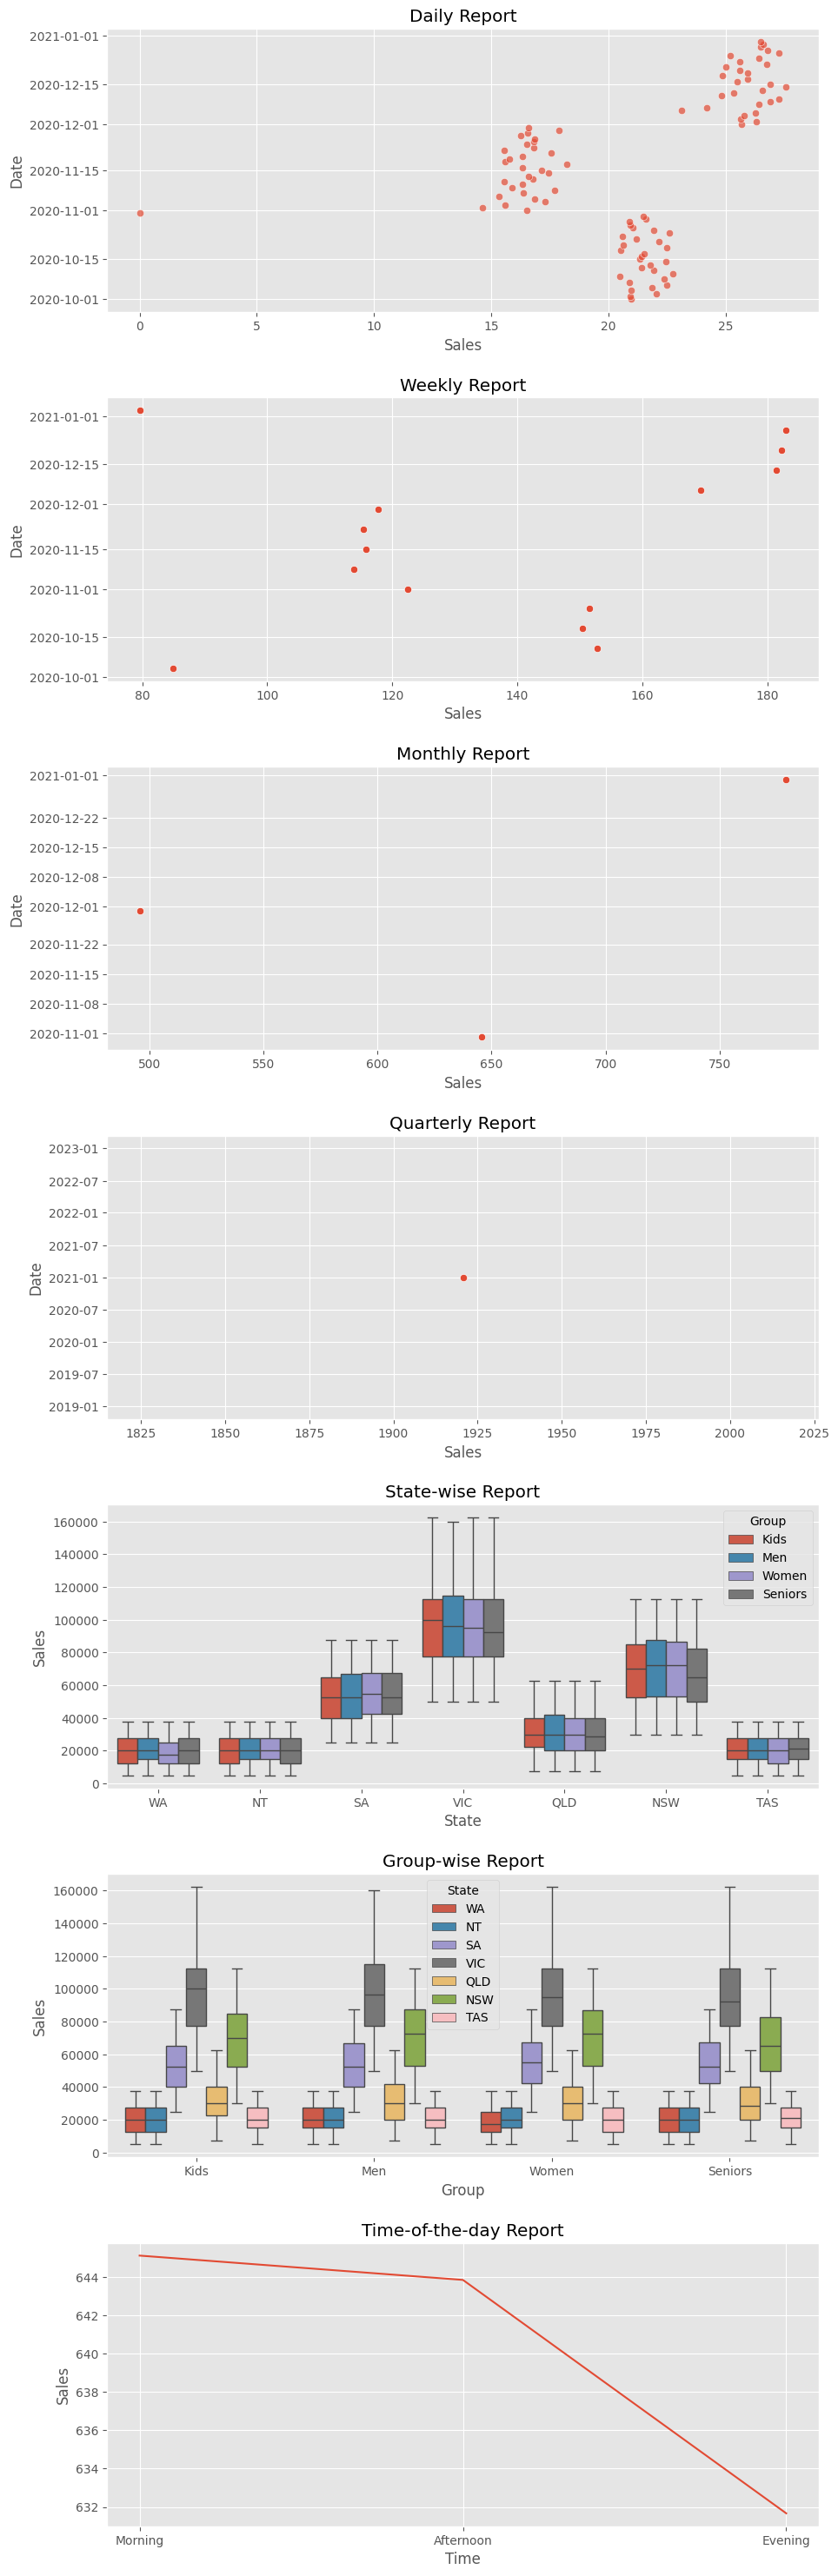

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10,30))
plt.style.use('ggplot')
sns.scatterplot(data=daily_report, x='Sales', y='Date', alpha=0.7, ax=axes[0])
axes[0].set_title('Daily Report')
sns.scatterplot(data=weekly_report, x='Sales', y='Date', ax=axes[1])
axes[1].set_title('Weekly Report')
sns.scatterplot(data=monthly_report, x='Sales', y='Date', ax=axes[2])
axes[2].set_title('Monthly Report')
sns.scatterplot(data=quarterly_report, x='Sales', y='Date', ax=axes[3])
axes[3].set_title('Quarterly Report')
sns.boxplot(x='State',y='Sales',hue='Group', data=df, ax=axes[4])
axes[4].set_title('State-wise Report')
sns.boxplot(x='Group',y='Sales',hue='State', data=df, ax=axes[5])
axes[5].set_title('Group-wise Report')
sns.lineplot(x='Time',y='Sales', data=time_of_day_df,ax=axes[6])
axes[6].set_title('Time-of-the-day Report')
fig.tight_layout(pad=2, w_pad=1)
plt.show();